In [1]:
from __future__ import print_function

import torch
from torchvision.datasets import FashionMNIST
import copy
from torch.nn import Sequential
import torch. nn as nn
from torch.nn import Linear, Conv2d, MaxPool2d, Flatten, ReLU,Dropout,Dropout2d
from torch.optim import RMSprop
from torch.optim import SGD
from torch import optim
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#Essentials numbers

batch_size = 128
epochs = 25
learning_rate = 0.01

In [3]:
#Download fashion data set
train_set = FashionMNIST(
    root = './data/FashionMNIST',
    train = True,
    download = True,
    transform = transforms.Compose([
        transforms.Resize((32,32)),
        transforms.ToTensor(),
        transforms.Normalize(mean = (0.1307,), std = (0.3081,))
    ])
)
# data augmentation
# what? why?

test_set = FashionMNIST(
    root = './data/FashionMNIST',
    train = False,
    download = True,
    transform = transforms.Compose([
        transforms.Resize((32,32)),
        transforms.ToTensor(),
        # transforms.Normalize(mean = (0.1325,), std = (0.3105,))
        transforms.Normalize(mean = (0.1307,), std = (0.3081,))
    ])
)

In [4]:
#Define data loaders
train_loader = torch.utils.data.DataLoader(dataset=train_set,
                                           batch_size=batch_size)

test_loader = torch.utils.data.DataLoader(dataset=test_set,
                                           batch_size=batch_size)


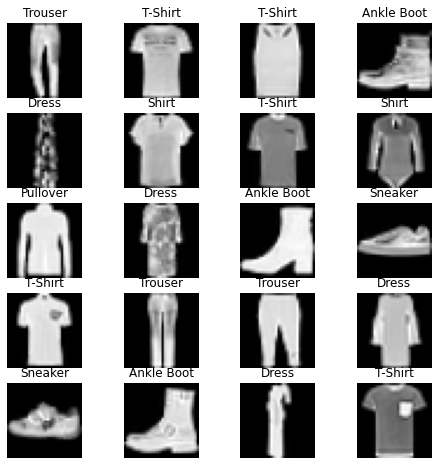

In [5]:
labels_map = {0 : 'T-Shirt', 1 : 'Trouser', 2 : 'Pullover', 3 : 'Dress', 4 : 'Coat', 5 : 'Sandal', 6 : 'Shirt',
              7 : 'Sneaker', 8 : 'Bag', 9 : 'Ankle Boot'};
fig = plt.figure(figsize=(8,8));
columns = 4;
rows = 5;
for i in range(1, columns*rows +1):
    img_xy = np.random.randint(len(train_set));
    img = train_set[img_xy][0][0,:,:]
    fig.add_subplot(rows, columns, i)
    plt.title(labels_map[train_set[img_xy][1]])
    plt.axis('off')
    plt.imshow(img, cmap='gray')
plt.show()

In [6]:
class create_model(torch.nn.Module):

    def __init__(self):
        super(create_model, self).__init__()
        
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=64, kernel_size=2, padding=0),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
            nn.Dropout(0.3))
        
        self.layer2 = nn.Sequential(
            nn.Conv2d(in_channels=64,out_channels=32,kernel_size=2,padding=0),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
            nn.Dropout(0.3))
        
        
        # self.flattern = torch.nn.Flatten()
        self.fc1 = torch.nn.Linear(in_features=32*7*7,out_features=256)
        self.activation3 = torch.nn.ReLU()
        self.DropOut3 = torch.nn.Dropout(0.5)
        self.fc2 = torch.nn.Linear(in_features=256,out_features=10)
        
        

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        # x = x.reshape(x.size(0), -1)
        # x = self.flattern(x)
        x = x.view(-1,32*7*7)
        x = self.fc1(x)
        x = self.activation3(x)
        x = self.DropOut3(x)
        x = self.fc2(x)
        
        return x
    
    
# h1 = [h-k+2p/s] +1 
# h = heigh
# k = kernel size
# p = padding
# s = stride

In [7]:
# example_model = create_model()
# for i, (images,labels) in enumerate(train_loader):
#     pred = example_model(images)
#     break

In [8]:
def validate(model, data):
    total = 0
    correct = 0
    
    for i, (images,labels) in enumerate(data):
        x = model(images)
        value, pred = torch.max(x,1)
        pred = pred.data.cpu()
        total += x.size(0)
        
        correct += torch.sum(pred == labels)
    return correct * 100. / total

In [9]:
def train(num_epoch, lr, device="cpu"):
    accuracies = []
    loss_list = []
    cnn = create_model().to(device)
    cec = nn.CrossEntropyLoss()
    # optimizer = optim.Adam(cnn.parameters(),lr=lr)
    optimizer = optim.Adam(cnn.parameters(),lr=1e-3, eps=1e-07, weight_decay=0, amsgrad=False)
    max_accuracy = 0
    for epoch in range(num_epoch):
        for i, (images,labels) in enumerate(train_loader):
            images = images.to(device)
            labels = labels.to(device)
            optimizer.zero_grad()
            pred = cnn(images)
            loss = cec(pred,labels)
            loss.backward()
            optimizer.step()
        
        accuracy = float(validate(cnn,test_loader))
        accuracies.append(accuracy)
        
        if accuracy > max_accuracy:
            best_model = copy.deepcopy(cnn)
            max_accuracy = accuracy
            print("Saving best model with accuracy {}".format(accuracy))
        print("Epoch: ", epoch + 1, "Accuracy: ", accuracy, "%")
    plt.plot(accuracies)
    return best_model

In [10]:
if torch.cuda.is_available():
    device = torch.device("cuda: 0")
else:
    device = torch.device("cpu")

In [11]:
device

device(type='cpu')

Saving best model with accuracy 82.12999725341797
Epoch:  1 Accuracy:  82.12999725341797 %
Saving best model with accuracy 84.30999755859375
Epoch:  2 Accuracy:  84.30999755859375 %
Saving best model with accuracy 86.08000183105469
Epoch:  3 Accuracy:  86.08000183105469 %
Epoch:  4 Accuracy:  85.80999755859375 %
Saving best model with accuracy 87.05000305175781
Epoch:  5 Accuracy:  87.05000305175781 %
Saving best model with accuracy 87.19999694824219
Epoch:  6 Accuracy:  87.19999694824219 %
Saving best model with accuracy 87.9000015258789
Epoch:  7 Accuracy:  87.9000015258789 %
Epoch:  8 Accuracy:  87.86000061035156 %
Saving best model with accuracy 88.23999786376953
Epoch:  9 Accuracy:  88.23999786376953 %
Epoch:  10 Accuracy:  88.12000274658203 %
Epoch:  11 Accuracy:  88.20999908447266 %
Saving best model with accuracy 88.7300033569336
Epoch:  12 Accuracy:  88.7300033569336 %
Saving best model with accuracy 88.73999786376953
Epoch:  13 Accuracy:  88.73999786376953 %
Saving best model

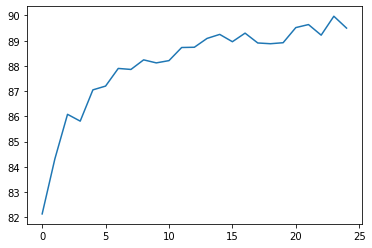

In [12]:
fashion_model = train(num_epoch=epochs,lr=learning_rate,device=device)

In [13]:
from sklearn.metrics import confusion_matrix
import pandas as pd

In [14]:
def predict_pl(model,data):
    y_pred = []
    y_true = []
    
    for i, (images,labels) in enumerate(data):
        x = model(images)
        value, pred = torch.max(x,1)
        pred = pred.data
        y_pred.extend(list(pred.numpy()))
        y_true.extend(list(labels.numpy()))
    return np.array(y_pred), np.array(y_true)

In [15]:
y_pred, y_true = predict_pl(fashion_model,test_loader)

In [16]:
labels_map = ['T-Shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt',
              'Sneaker', 'Bag', 'Ankle Boot']
pd.DataFrame(confusion_matrix(y_true,y_pred,labels =np.arange(0,10)))

,0,1,2,3,4,5,6,7,8,9
0,854,0,24,29,4,3,80,0,6,0
1,1,979,2,13,3,0,2,0,0,0
2,16,0,877,9,56,0,41,0,1,0
3,24,10,8,901,28,0,25,0,4,0
4,1,1,96,40,791,0,70,0,1,0
5,1,0,0,0,0,983,0,12,0,4
6,128,1,90,22,75,0,676,0,8,0
7,0,0,0,0,0,12,0,952,0,36
8,3,0,2,6,3,2,2,3,978,1
9,0,0,0,0,0,4,0,26,1,969
